# < 내장 자료구조, 함수, 파일 >

### enumerate

In [3]:
li = ['foo','bar','baz']
mapping = {}

for i, v in enumerate(li):
    mapping[v] = i
    
mapping

{'foo': 0, 'bar': 1, 'baz': 2}

In [8]:
#다음을 인텍스로 하는 딕셔너리로 만들기

li = ['apple', 'banana', 'cherry', 'date']

{i:j for i,j in enumerate(li)}

{0: 'apple', 1: 'banana', 2: 'cherry', 3: 'date'}

### sorted : 정렬
- 정렬

In [5]:
sorted([6,5,6,2,4,3,5,2,4])

[2, 2, 3, 4, 4, 5, 5, 6, 6]

### zip : 다른 자료형과 짝지어줌 
- 다른 순차 자료형과 짝지어줌

In [11]:
a = ['foo', 'bar', 'baz']
b = ['one', 'two', 'three']

zipping = zip(a,b)
list(zipping)

[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]

- zip과 enumerate가 함께 사용 가능

In [13]:
for i, (c,d) in enumerate(zip(a, b)):
    print('{0}: {1},{2}'.format(i,c,d))

0: foo,one
1: bar,two
2: baz,three


### reversed : 역순
- 역순

In [19]:
a = [1,2,3,4,5]

list(reversed(a))

[5, 4, 3, 2, 1]

## ▷사전

In [20]:
empty_dict = {}
d1 = {'a' : 'some value', 'b':[1,2,3,4]}
d1

{'a': 'some value', 'b': [1, 2, 3, 4]}

### keys

In [23]:
list(d1.keys())

['a', 'b']

### values : 데이터 프레임을 배열로 바꾸기
- df라는 데이터 프레임 뒤에 .values()라고 붙여주기

In [24]:
list(d1.values())

['some value', [1, 2, 3, 4]]

### update : 사전에 새로운 것 추가
- 사전에 새로운 것을 추가

In [25]:
d1.update({'b':'foo', 'c':'12'})
d1

{'a': 'some value', 'b': 'foo', 'c': '12'}

## ▷집합

### set : 집합 생성
- 집합 생성

In [26]:
set([1,2,3,4,4,5])

{1, 2, 3, 4, 5}

- 합집합 -> |

In [28]:
a = {1,2,3,4}
b = {3,4,5,6}

a|b

{1, 2, 3, 4, 5, 6}

- 교집합 -> intersection

In [29]:
a.intersection(b)

{3, 4}

## ▷리스트, 집합, 사전 표기법

In [ ]:
result = []
for val in collection:
    if condition:
        result.append(expr)

In [ ]:
expr for val in collection if condition  # 위 아래 같은 문장(리스트 표기법)

In [3]:
#중첩된 리스트 표기법

all_data = [['John','Emily','Michael','Mary','Steven'],
            ['Maria','Juan','Javier','Natalia','Pilar']]

In [21]:
a = [name for i in all_data for name in i
     if name.count('e') >= 2]

list(a)

['Steven']

In [22]:
a = [(1,2,3),(4,5,6),(7,8,9)]
c = [b for i in a for b in i]
c

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## ▷익명함수

### lambda
- '익명 함수를 선언한다'
- (lambda 매개변수 : 표현식)(x,y의 각각 넣어줄 숫자)

In [29]:
def hap(x, y):
    return x + y

hap(10, 20)   # 이 식을 간단하게 하면 밑에처럼 쓸 수 있다.

30

In [30]:
(lambda x,y : x+y)(10,20)

30

In [ ]:
m = lambda x :x[0]  #이렇게도 쓰임

## ▷제너레이터

### Iterable
- 반복 가능한 객체
- 대표적인 iterable한 타입 : list, dict, set, str, bytes, tuple, range

### Iterator
- 값을 차례대로 꺼낼 수 있는 객체
- 파이썬 내장함수인 iter()를 사용해서 iterator 객체를 만들 수 있다.

### Generator
- 순회 가능한 객체를 생성하는 간단한 방법, 함수안에 yield 키워드를 사용
- yield 가 호출되면 암시적으로 return이 호출되며,

  한번 더 실행되면 실행되었던 yield 다음 코드가 실행된다.
- 특징
   1. iterable한 순서가 지정됨(모든 generator는 iterator)
   2. 무한한 순서가 있는 객체를 모델링할 수 있다.(for문에서 사용 가능)

In [40]:
a = {'A':1, 'B':2, 'C':3}

for key in a:
    print(key)

A
B
C


In [39]:
def number_generator():
    yield 0
    yield 1
    yield 2
    yield 3

for i in number_generator():
    print(i)

0
1
2
3


- 제너레이터 표현식

In [41]:
gen = (x**2 for x in range(100))

In [43]:
def make_gen():
    for x in range(100):
        yield x**2

gen와 make_gen은 동일한 코드이다.

### itertools 모듈 : 동일한 키들은 그룹지어줌
- 매개변수로 입력된 iterable 안에 있는 키를 확인 후,
  
  분류하여 동일한 키를 가진 element들을 해당 키를 기준으로
  그룹지어 리턴한다.

In [46]:
from itertools import groupby

a = [('Europe', 'Manchester'),
    ('Asia', 'Seoul'),
    ('Asia', 'Tokyo'),
    ('America', 'NewYork')]

In [48]:
m = lambda x :x[0]
g = groupby(a, m)

for key, group in g:
    print(key + ':', list(group))

Europe: [('Europe', 'Manchester')]
Asia: [('Asia', 'Seoul'), ('Asia', 'Tokyo')]
America: [('America', 'NewYork')]


In [83]:
name = ['Alan', 'Adam', 'Wes', 'Will', 'Steven']

first_name = lambda x : x[0]
g = groupby(name, first_name)

for first, group in g:
    print(first, ':', list(group))

A : ['Alan', 'Adam']
W : ['Wes', 'Will']
S : ['Steven']


# < Numpy >

### array : 배열 생성
- 배열을 생성한다.

In [86]:
import numpy as np

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [87]:
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

```
arr1은 1차원 형태로 생성되었고
arr2는 해당 데이터로부터 형태를 추론해서 2차원 형태로 생성되었다.
```

In [2]:
import numpy as np
a= np.arange(1,13).reshape(2,2,3)
a

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

- np.zeros()

In [88]:
np.zeros((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

- np.ones()

In [90]:
np.ones((2,3,2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

- np.arange()

In [92]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### astype('데이터타입') : 변경
- 데이터 타입을 명시해준다.

In [100]:
a = np.array(['1.25', '-9.6', '42'])

a = a.astype('float')
a

array([ 1.25, -9.6 , 42.  ])

### 슬라이싱

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
arr[5:8]

array([5, 6, 7])

In [103]:
arr[5:8] = 12

In [104]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

리스트와의 중요한 차이점은 배열 조각은 원본 배열의 '뷰'라는 점이다.

즉, 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영된다.

### concatenate( ) : 이어붙이기

In [1]:
# 축 따라 이어붙이기
import numpy as np
arr=np.arange(12).reshape((3,4))
arr1 = arr.copy()
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [2]:
np.concatenate([arr,arr1],axis=0) 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### diag( ) : 대각 성분 추출
```
- np.diag(array,k= )
- 1차원과 2차원 array만을 받을 수 있다.(3차원은 오류 발생)
- k값 : k를 지정하여 오른쪽/왼쪽으로 k칸 치우친 방향의 대각 성분 획득 가능
```

In [1]:
import numpy as np
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [2]:
np.diag(a)

array([1, 5, 9])

In [4]:
np.diag(a,k = 1)

array([2, 6])

In [5]:
np.diag(a,k = -1)

array([4, 8])

### unravel_index() : 입력값 x,y,z자리 출력
- np.unravel_index(자리를 알고자 하는 숫자, (x,y,z))

In [8]:
np.unravel_index([22, 41, 37], (7,6))

(array([3, 6, 6], dtype=int64), array([4, 5, 1], dtype=int64))

### T, transpose 메서드 : 배열 전치와 축 바꾸기
- transpose 메서드, T

In [10]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [11]:
np.transpose(arr)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [4]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

### 유니버설 함수
```
- np.sqrt(a)                   ->루트, np.exp(a)
- np.add(a,b), np.maximum(a,b)
- divmod( , ), np.modf(데이터) -> 몫과 나머지를 한번에 보여준다.
```

In [13]:
import numpy as np

a = np.arange(1,17).reshape(4,4)
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [14]:
np.sqrt(a**2)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [16]:
a = np.arange(1,17).reshape(4,4)
b = np.arange(16,0,-1).reshape(4,4)
print(a)
print()
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[16 15 14 13]
 [12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]


In [17]:
np.maximum(a,b)

array([[16, 15, 14, 13],
       [12, 11, 10,  9],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [18]:
divmod(16, 5)

(3, 1)

In [19]:
a = np.random.randn(3,3)
np.modf(a)

(array([[ 0.30398671,  0.635314  ,  0.90723258],
        [ 0.04672458,  0.5569218 ,  0.66153258],
        [-0.46103427,  0.58404013, -0.53375922]]),
 array([[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [-0.,  0., -0.]]))

### meshgrid() : 직사각형 격자
- x값의 배열과 y값의 배열로 직사각형 격자를 만드는 것이 목적

In [20]:
points = np.arange(1,4)
points

array([1, 2, 3])

In [21]:
np.meshgrid(points, points)

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

행으로 [1,2,3] 으로 나열 되고 다음에는 열로 [1,2,3]으로 나열되어 있다.

In [23]:
xs, ys = np.meshgrid(points, points)

z = np.sqrt(xs**2 + ys**2)
z

array([[1.41421356, 2.23606798, 3.16227766],
       [2.23606798, 2.82842712, 3.60555128],
       [3.16227766, 3.60555128, 4.24264069]])

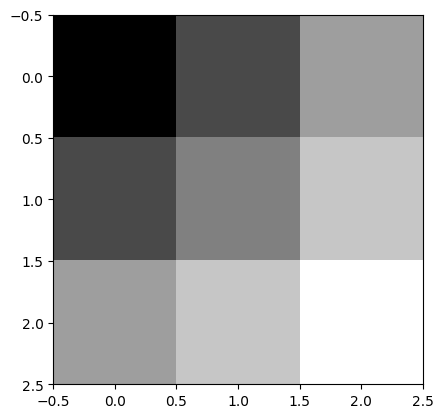

In [24]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap =plt.cm.gray)

In [25]:
points = np.arange(-5,5, 0.01)
print(points)

print()
np.meshgrid(points, points)

[-5.0000000e+00 -4.9900000e+00 -4.9800000e+00 -4.9700000e+00
 -4.9600000e+00 -4.9500000e+00 -4.9400000e+00 -4.9300000e+00
 -4.9200000e+00 -4.9100000e+00 -4.9000000e+00 -4.8900000e+00
 -4.8800000e+00 -4.8700000e+00 -4.8600000e+00 -4.8500000e+00
 -4.8400000e+00 -4.8300000e+00 -4.8200000e+00 -4.8100000e+00
 -4.8000000e+00 -4.7900000e+00 -4.7800000e+00 -4.7700000e+00
 -4.7600000e+00 -4.7500000e+00 -4.7400000e+00 -4.7300000e+00
 -4.7200000e+00 -4.7100000e+00 -4.7000000e+00 -4.6900000e+00
 -4.6800000e+00 -4.6700000e+00 -4.6600000e+00 -4.6500000e+00
 -4.6400000e+00 -4.6300000e+00 -4.6200000e+00 -4.6100000e+00
 -4.6000000e+00 -4.5900000e+00 -4.5800000e+00 -4.5700000e+00
 -4.5600000e+00 -4.5500000e+00 -4.5400000e+00 -4.5300000e+00
 -4.5200000e+00 -4.5100000e+00 -4.5000000e+00 -4.4900000e+00
 -4.4800000e+00 -4.4700000e+00 -4.4600000e+00 -4.4500000e+00
 -4.4400000e+00 -4.4300000e+00 -4.4200000e+00 -4.4100000e+00
 -4.4000000e+00 -4.3900000e+00 -4.3800000e+00 -4.3700000e+00
 -4.3600000e+00 -4.35000

[array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])]

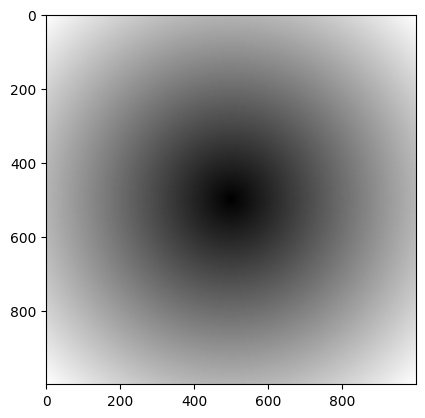

In [26]:
xs, ys = np.meshgrid(points, points)
z = np.sqrt(xs**2 + ys**2)
z

import matplotlib.pyplot as plt
plt.imshow(z, cmap =plt.cm.gray)

### 수학 메서드 & 통계 메서드
- arr.mean()  , np.mean()
- arr.sum()
- arr.cumsum(행? 열?) -> 누적합
- arr.cumprod(행? 열?) -> 누적곱

In [27]:
arr = np.random.randn(5,4)
arr

array([[ 0.51553246, -1.45102773, -1.08414835,  0.19186633],
       [-0.27911283,  0.09010319, -1.95918296, -0.60664354],
       [-1.85825892,  0.64307693, -0.77369189, -0.88299936],
       [ 0.40148987, -0.33762664,  0.54507442, -0.69642304],
       [-0.35425791, -1.90804557,  1.3896752 , -0.55956771]])

In [28]:
arr.mean()

-0.44870840384666044

In [29]:
np.mean(arr)

-0.44870840384666044

In [30]:
arr.sum()

-8.974168076933209

In [31]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [33]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### sort : 1차원 부분을 정렬
- 1차원 부분을 정렬

In [37]:
myList = [4, 2, 3, 5, 1]
myList.sort()
myList

[1, 2, 3, 4, 5]

In [34]:
arr = np.random.randn(5,3)
arr

array([[ 0.31745891, -0.68218697,  0.70901448],
       [ 0.41076896, -0.54433856, -0.21102576],
       [ 0.43627278, -0.34591095, -1.49515884],
       [-1.90004005, -1.38823834, -0.40893669],
       [-0.19010477, -1.09398631, -0.64302145]])

In [38]:
arr.sort(axis = 1)
arr

array([[-0.68218697,  0.31745891,  0.70901448],
       [-0.54433856, -0.21102576,  0.41076896],
       [-1.49515884, -0.34591095,  0.43627278],
       [-1.90004005, -1.38823834, -0.40893669],
       [-1.09398631, -0.64302145, -0.19010477]])

#### → sort( ) 와 sorted( ) 의 차이

```
sort()   -> 리스트를 정렬된 상태로 변경한다.
sorted() -> 이터러블 객체로부터 정렬된 리스트를 생성한다.
            (내장함수이다.)
```

### np.unique() : 중복 원소 제거 후 정렬
- 배열 내에서 중복된 원소를 제거하고 남은 원소를 정렬된 형태로 반환하는 함수

In [105]:
name = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [106]:
np.unique(name)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

### np.in1d : 입력값을 포함하는지 확인
- 정해준 원소가 포함하는지 나타내는 불리언 배열

In [5]:
import numpy as np

In [6]:
a = np.array([6,0,0,3,2,5,6])

np.in1d(a, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

### np.random : 랜덤
```
- randint   -> 주어진 최소/최대 범위 안에서 정수 값만을 return하는 함수이다.
               randint(최대 범위 숫자, size = )
- randn     -> 표준편차가 1이고 평균값이 0인 정규분포에서 표본을 추출
- normal    -> 정규분포에서 표본을 추출
- uniform   -> 0과 1사이에서 추출하는 균등분포/ 설정값에 따라 좀 더 섬세하게 추출가능
- np.random.seed(시작점의 값)  ->  random을 할때 출발하는 시작점에 값을 준다.
                                   주의할 점은 준 값이 설정되서 그 범위에서만 계속 랜덤하게 추출된다.
                                   
- np.random.RandomState(시작점의 값)  -> 실행 할때만 주어지고 실행 후에는 사라진다.
                                         (이렇게 쓰길 권장한다.)
```                                    

In [1]:
import numpy as np
np.random.randint(3,10, size = (2,3))

array([[5, 6, 8],
       [8, 5, 6]])

In [2]:
np.random.randn(2,3)

array([[-0.21231612,  0.52955537,  1.54793731],
       [ 0.20244027,  1.06915414, -0.8766074 ]])

In [108]:
a = np.random.normal(size = (4,4))
a

array([[-0.95251574, -2.33397988, -1.86659069, -0.99808454],
       [ 0.81976274, -1.91849312, -0.6951497 , -1.05566583],
       [ 1.07599734, -0.1356794 , -0.72891413, -0.96165884],
       [-0.49812924,  0.08643829, -0.42618419, -1.31830111]])

normal을 이용하여 표준정규분포로부터 4X4크기의 표본 생성함

In [3]:
np.random.uniform(size = (2,3))

array([[0.93903968, 0.71859793, 0.42493715],
       [0.46547304, 0.17939599, 0.49430229]])

<한 개만 추출하기>
```
random.uniform(0,1)
random.random()  -> 기본적인 형태(보통은 이렇게 쓴다.)
```

# < Pandas >

### Series : 1차원 자료구조
- 객체를 담을 수 있는 1차원 자료구조

```
- s.values                    -> 값 출력
- s.index                     -> 인덱스 범위 출력
- pd.isnull(s), pd.notnull(s) -> 누락된 데이터(NA)을 찾을 때 사용
```

In [6]:
import pandas as pd

In [7]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [9]:
obj.values  #값만 보여준다.

array([ 4,  7, -5,  3], dtype=int64)

In [10]:
obj.index  #인덱스 범위

RangeIndex(start=0, stop=4, step=1)

In [12]:
s = pd.Series([4,7,-5,3], index = ['a', 'b', 'c', 'd']) #인덱슨느 숫자만 가능한 것이 아니라 문자열도 가능하다.
s

a    4
b    7
c   -5
d    3
dtype: int64

In [13]:
s[['a', 'b']]  #인덱싱 : 인덱스로 골라내기

a    4
b    7
dtype: int64

In [14]:
s > 0

a     True
b     True
c    False
d     True
dtype: bool

In [15]:
s[s>0]

a    4
b    7
d    3
dtype: int64

In [17]:
#파이썬 사전 객체로부터 Series 객체 생성 가능
states = ['California', 'Ohio', 'Oregon', 'Texas'] 
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Key는 인덱스로 values는 값으로 잡힌다.

In [18]:
states = ['California', 'Ohio', 'Oregon', 'Texas'] 
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

obj4 = pd.Series(sdata, index = states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [19]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [20]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [21]:
#인덱스 바꾸기
obj4.index = ['a','b','c','d']
obj4

a        NaN
b    35000.0
c    16000.0
d    71000.0
dtype: float64

```
<주의>

obj4.index[0] = 'A' 을 실행시키면
TypeError: Index does not support mutable operations 이라는 오류 발생

에러 해결 : 인덱스 바꿔줄때는 하나만 못 바꾸고 한꺼번에 바꿔줘야 한다.
```

### DataFrame

- df.loc[ , ], df.iloc[ , ]  -> 접근방법

```
  array[]는 바로 접근할 수 있지만 데이터 프레임에서는 불가능하다.
  그래서 중간에 꼭 df.loc[,]나 df.iloc[,]으로 접근해야 한다.

  
 - del frame['eastern']  -> 삭제
 - frame.T               -> 칼럼과 로우 뒤집기
 - frame.values          -> 값 출력
```

In [22]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [29]:
#원하는 이름과 순서로 colums 지정하기
print(pd.DataFrame(data, columns = ['year','state','pop','debt']))  #'debt'이라는 없는 칼럼이 생성됨
print()
print(pd.DataFrame(data, columns = ['state','year','pop','debt']))

   year   state  pop debt
0  2000    Ohio  1.5  NaN
1  2001    Ohio  1.7  NaN
2  2002    Ohio  3.6  NaN
3  2001  Nevada  2.4  NaN
4  2002  Nevada  2.9  NaN
5  2003  Nevada  3.2  NaN

    state  year  pop debt
0    Ohio  2000  1.5  NaN
1    Ohio  2001  1.7  NaN
2    Ohio  2002  3.6  NaN
3  Nevada  2001  2.4  NaN
4  Nevada  2002  2.9  NaN
5  Nevada  2003  3.2  NaN


In [23]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [24]:
df['key']

0    b
1    b
2    a
3    c
4    a
5    b
Name: key, dtype: object

#### → loc[ , ], iloc[ , ]
- loc[0] : index 이름이 0인 행&값을 추출
- iloc[0] : 0번째 행을 추출

In [12]:
#행 추가
df.loc['sum'] = df.sum(axis = 0)
df

,b,d,e
utah,-0.136074,-0.322008,-1.639728
ohio,0.697473,0.900291,1.094532
texas,1.434134,1.726379,-0.086469
oregon,0.299478,-0.707894,-0.877948
sum,2.295011,1.596768,-1.509613


In [13]:
df.loc[['utah', 'ohio'],]

,b,d,e
utah,-0.136074,-0.322008,-1.639728
ohio,0.697473,0.900291,1.094532


In [14]:
df.iloc[[0,1],]

,b,d,e
utah,-0.136074,-0.322008,-1.639728
ohio,0.697473,0.900291,1.094532


In [15]:
df[:2]  #이렇게 3개 다 같은 방법

,b,d,e
utah,-0.136074,-0.322008,-1.639728
ohio,0.697473,0.900291,1.094532


In [18]:
df.loc['ohio']  #행을 뽑는 방법

b    0.697473
d    0.900291
e    1.094532
Name: ohio, dtype: float64

In [31]:
df = frame.copy()

df.loc[:,'state']      #빈칸으로 두면 안되고 뭐라도 써야한다.

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [32]:
df.loc[:,['state','year']]

,state,year
0,Ohio,2000
1,Ohio,2001
2,Ohio,2002
3,Nevada,2001
4,Nevada,2002
5,Nevada,2003


In [33]:
df.iloc[:, [0]]

,state
0,Ohio
1,Ohio
2,Ohio
3,Nevada
4,Nevada
5,Nevada


In [35]:
frame['eastern'] = frame.state == 'Ohio'
frame

,state,year,pop,eastern
0,Ohio,2000,1.5,True
1,Ohio,2001,1.7,True
2,Ohio,2002,3.6,True
3,Nevada,2001,2.4,False
4,Nevada,2002,2.9,False
5,Nevada,2003,3.2,False


In [36]:
del frame['eastern']   #삭제
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [37]:
frame.T  #칼럼과 로우 뒤집기

,0,1,2,3,4,5
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
year,2000,2001,2002,2001,2002,2003
pop,1.5,1.7,3.6,2.4,2.9,3.2


In [40]:
frame.values   #DataFrame을 array(2차원 배열)로 바꿔주고 싶으면 뒤에 .values라고 붙이기

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

### index
- 파이썬의 집합과는 달리 pandas의 인덱스는 중복되는 값을 허용한다.
- 인덱스 번호로 출력되는 순서를 바꿀 수 있다.
- index만으로 새로운 인덱스와 NA값까지 부여할 수 있다.(np.nan)

In [41]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [42]:
df.index = ['a','b','c','a','b','c']
df

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
a,Nevada,2001,2.4
b,Nevada,2002,2.9
c,Nevada,2003,3.2


In [1]:
#마음대로 인덱스 순서 바꾸기
dic = {'one': 1, 'two': 2, 'three': 3}
dic

{'one': 1, 'two': 2, 'three': 3}

In [3]:
import pandas as pd
s = pd.Series(dic)
s

one      1
two      2
three    3
dtype: int64

In [4]:
s.index = ['two', 'three', 'four']
s

two      1
three    2
four     3
dtype: int64

In [6]:
#인덱스 새로 만들고 NA값 부여하기
import numpy as np
s['four'] = np.nan
s

two      1.0
three    2.0
four     NaN
dtype: float64

In [19]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four']) 
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [20]:
#이 함수를 사용하여 인덱스를 대문자로 바꾸기
f = lambda x : x[:4].upper()
f('abcedf')  #잘 작동 되었는지 확인한것

'ABCE'

In [21]:
data.index = data.index.map(f)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [22]:
#칼럼 대문자로 바꾸기
data.columns = data.columns.map(f)
data

,ONE,TWO,THRE,FOUR
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


#### → resample( ) : 원하는 주기로 나누기
- Datetime Index를 원하는 주기로 나누어주는 메서드
- 자세한건 <시간, 날짜>

#### →reindex : 인덱스 바꾸기
- 인덱스 다시 바꾸기

- method = 'ffill' -> 결측치를 직전의 값으로 채워 넣어주는 방법

In [43]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c']) 
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [46]:
obj.reindex(['a','b','c','d','e'])
#덮어쓰는게 아니라 정렬을 해주는 모습이다.
#그래서 e는 값이 없는 것으로 나왔다.

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [49]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [50]:
obj = obj.reindex(['a','b','c','d'])
obj

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [51]:
obj['b' : 'c']    #슬라이싱도 가능하다.

b    7.2
c    3.6
dtype: float64

In [52]:
obj > 0

a    False
b     True
c     True
d     True
dtype: bool

In [ ]:
obj[obj > 0]

b    7.2
c    3.6
d    4.5
dtype: float64

#### → str.title( ) : 인덱스 첫글자 대문자로

In [2]:
import pandas as pd
import numpy as np
data=pd.DataFrame(np.arange(12).reshape((3,4)),

                 index=['ohio','colorado','NewYork'],

                 columns=['one','two','three','four'])

data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
NewYork,8,9,10,11


In [3]:
data.rename(index =str.title) 

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Newyork,8,9,10,11


### drop : 제외
- df.drop(['a'], axis=0)  -> 'a'을 제외시킨다.(axis=0은 열, 1은 행이다.)
- drop 함수는 크기 또는 형태를 변경하지만 원본 객체를 변경하니 주의할것

In [ ]:
df.drop(['a'], axis=0)

,state,year,pop
b,Ohio,2001,1.7
c,Ohio,2002,3.6
b,Nevada,2002,2.9
c,Nevada,2003,3.2


In [48]:
df.drop(['state'], axis=1)

,year,pop
a,2000,1.5
b,2001,1.7
c,2002,3.6
a,2001,2.4
b,2002,2.9
c,2003,3.2


### cut( )
- 자세한 설명은 <데이터 준비>

In [16]:
#value가 0은 none, 1~9는 few, 10~19는 many라는 새로운 열 frequency를 추가시켜라.
#pd.cut( )을 사용하기
mpg=pydataset.data('mpg') 
df=pd.crosstab(mpg['class'], mpg['manufacturer']) 
df1=df.reset_index()
df1 = df1.melt(id_vars='class' ,value_vars= df1.columns[:])
df1.head()

,class,manufacturer,value
0,2seater,audi,0
1,compact,audi,15
2,midsize,audi,3
3,minivan,audi,0
4,pickup,audi,0


In [17]:
df1['frequency'] = pd.cut(df1['value'], bins=[0,1,10,20], right=False, labels=['none', 'few', 'many'])
df1.head()

,class,manufacturer,value,frequency
0,2seater,audi,0,none
1,compact,audi,15,many
2,midsize,audi,3,few
3,minivan,audi,0,none
4,pickup,audi,0,none


### 유니버설 함수 적용
```
- np.abs(frame)        : 음수를 전부 양수로 바꿔준다.
- frame.apply(sum)     : 총 합
- frame.apply(np.mean) : 평균
- frame.mix(),frame.max()
- frame.apply(lambda x : 람다식, axis = )
```

In [56]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon']) 
frame

,b,d,e
Utah,-0.477258,-1.465341,-1.828722
Ohio,0.037826,-0.959602,1.212432
Texas,-0.417939,0.655925,0.938720
Oregon,0.098010,-0.375021,-1.564697


In [57]:
#음수를 전부 양수로 만들어주세요.
frame = np.abs(frame)
frame

,b,d,e
Utah,0.477258,1.465341,1.828722
Ohio,0.037826,0.959602,1.212432
Texas,0.417939,0.655925,0.938720
Oregon,0.098010,0.375021,1.564697


In [58]:
frame.apply(sum)

b    1.031034
d    3.455888
e    5.544571
dtype: float64

In [59]:
frame.apply(sum, axis = 1)

Utah      3.771321
Ohio      2.209860
Texas     2.012583
Oregon    2.037729
dtype: float64

In [60]:
frame.apply(np.mean)

b    0.257759
d    0.863972
e    1.386143
dtype: float64

In [61]:
frame.min()

b    0.037826
d    0.375021
e    0.938720
dtype: float64

In [62]:
frame.max()

b    0.477258
d    1.465341
e    1.828722
dtype: float64

In [63]:
#최댓값과 최솟값의 차이
def f(x):
    return x.max() - x.min()

frame.apply(f)

b    0.439432
d    1.090320
e    0.890002
dtype: float64

In [65]:
frame.apply(lambda x : x.max()-x.min(), axis = 1)   #위의 식과 같다

Utah      1.351464
Ohio      1.174606
Texas     0.520781
Oregon    1.466687
dtype: float64

In [68]:
form = lambda x : '%.2f' %x     #.2f : 소수점 이하 둘째자리까지, %는 변수라는 표시

frame.applymap(form)

,b,d,e
Utah,0.48,1.47,1.83
Ohio,0.04,0.96,1.21
Texas,0.42,0.66,0.94
Oregon,0.10,0.38,1.56


```
<주의>

frame.applymap(form)이라고 안하고 frame.apply(form)을 실행시키면
TypeError: cannot convert the series to <class 'float'>
이라는 오류가 발생한다.

apply가 에러나는 이유는 열로 통으로 잡아줘서이다.
applymap은 하나하나 터지해서 잡아주기 때문에 에러가X
```

#### → apply( ), applymap( )
- apply는 통으로 적용되고 applymap은 하나하나 터치해서 적용된다.

In [9]:
frame = pd.DataFrame(np.random.randn(4,3),columns=list('bde'),

                    index = ['utah','ohio','texas','oregon']) 

In [10]:
df = frame.copy()
df

,b,d,e
utah,-0.136074,-0.322008,-1.639728
ohio,0.697473,0.900291,1.094532
texas,1.434134,1.726379,-0.086469
oregon,0.299478,-0.707894,-0.877948


In [11]:
df_sum = df.apply(sum).T
df_sum

b    2.295011
d    1.596768
e   -1.509613
dtype: float64

### concat( ) : 이어붙이기
- 더 자세한 설명은 <데이터 변형>
- pandas의 concat은 데이터 프레임일때만 작동한다.

In [3]:
import pandas as pd

a = pd.DataFrame(arr)
b = pd.DataFrame(arr1)
pd.concat([a,b],axis=1) 

,0,1,2,3,0,1,2,3
0,0,1,2,3,0,1,2,3
1,4,5,6,7,4,5,6,7
2,8,9,10,11,8,9,10,11


### sort_index : 정렬 후 반환
- 로우나 칼럼을 알파벳순으로 정렬 후 정렬된 새로운 객체를 반환한다.

### sort_values : 값에 따라 정렬
- 값에 따라 정렬

#### → rank( ) : 순위 부여
- #4.5로 같은 랭크는 어떻게 처리해야하는가?

  s.rank(method = 'first', ascending=False)   
  #점수가 큰게 1등

- obj.sort_index()
- obj.sort_values()
- obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
- obj.rank()

In [70]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c']) 
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [71]:
obj.sort_index()

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [72]:
obj.sort_values()

a   -5.3
c    3.6
d    4.5
b    7.2
dtype: float64

In [73]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [74]:
obj.rank()      #tanking, 순위, 등수
                #동점인 항목에 대해서는 평균 순위를 매긴다.

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

### is_unique : 해당값이 유일한가?
- 해당 값이 유일한지 아닌지 알려주며 인덱스가 중복된 것이 있어도 가능하다.
- 중복되는 색인값이 있다면 Series객체를, 중복되는게 없다면 스칼라값을 반환한다.
- 스칼라값은 한 개의 숫자를 이야기 한다.

In [75]:
obj = pd.Series(range(5), index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [77]:
# 중복되는 색인값이 있는 경우
obj['a']

a    0
a    1
dtype: int64

In [79]:
# 중복되는 색인값이 없는 경우
obj['c']

4

### isin() : 입력값만 골라내기
- df.isin(골라낼 값, 여러개면 []로 묶기)
- 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰인다.

In [93]:
import pandas as pd

In [97]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})
df.isin([1, 3, 12, 'a'])  #이 값을 골라냈다.

,A,B
0,True,True
1,False,False
2,True,False


In [91]:
# a in b
if "a" in ['a','b','c']:
    print('Yes')     #isin과 같은 맥락

Yes


In [86]:
df.isin(['Ohio'])  #Ohio가 있나요? True

,state,year,pop
a,True,False,False
b,True,False,False
c,True,False,False
a,False,False,False
b,False,False,False
c,False,False,False


In [87]:
df['state'].isin(['Ohio'])

a     True
b     True
c     True
a    False
b    False
c    False
Name: state, dtype: bool

### 상관관계와 공분산
```
- price.corr()       : 상관관계를 보여준다.
- price.cov()        : 공분산을 보여준다.
- price.pct_change() : 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력한다.
                       즉, (다음행 - 현재행)÷현재행 을 의미
```

In [80]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})

price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-27,36.593594,109.783890,69.393127,47.224499
2017-09-28,36.368187,109.783890,69.411926,47.474998
2017-09-29,36.567486,109.346756,69.994499,47.955502
2017-10-02,36.493935,110.537598,70.107277,47.663502
2017-10-03,36.652916,110.628021,69.778397,47.889500
...,...,...,...,...
2022-09-20,156.899994,126.300003,242.449997,101.830002
2022-09-21,153.720001,124.930000,238.949997,100.010002
2022-09-22,152.740005,125.309998,240.979996,100.570000


In [83]:
price[['AAPL','IBM']].corr()    #서로의 상관관계를 보여준다.(1에 가까울수록 높은 상관관계)

,AAPL,IBM
AAPL,1.000000,0.529727
IBM,0.529727,1.000000


In [84]:
price.pct_change()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-09-27,NaN,NaN,NaN,NaN
2017-09-28,-0.006160,0.000000,0.000271,0.005304
2017-09-29,0.005480,-0.003982,0.008393,0.010121
2017-10-02,-0.002011,0.010891,0.001611,-0.006089
2017-10-03,0.004356,0.000818,-0.004691,0.004742
...,...,...,...,...
2022-09-20,0.015665,-0.011195,-0.008466,-0.019451
2022-09-21,-0.020268,-0.010847,-0.014436,-0.017873
2022-09-22,-0.006375,0.003042,0.008495,0.005599


### value_counts
- 어떤 컬럼/Series의 unique value들을 count해주는 함수
- Series에서 유일값에 대한 색인과 도수를 계산, 도수는 내림차순으로 정렬된다.
- data['Qu1'].value_counts()

In [88]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                      'Qu3': [1, 5, 2, 4, 4]}) 

data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [89]:
data['Qu1'].value_counts()

3    2
4    2
1    1
Name: Qu1, dtype: int64

In [11]:
df = data.apply(pd.value_counts)
df

NameError: name 'data' is not defined

### crosstab( ) : 그룹 빈도

In [12]:
#crosstab 데이터 프레임에서 제조사를 melt시켜라
#crosstab - 빈도수를 세어준 표
mpg = pydataset.data('mpg')
df=pd.crosstab(mpg['class'], mpg['manufacturer']) 
df 

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [13]:
df.columns

Index(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'],
      dtype='object', name='manufacturer')

In [14]:
df.melt(value_vars=['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'])  #칼럼 열어서 복붙함

,manufacturer,value
0,audi,0
1,audi,15
2,audi,3
3,audi,0
4,audi,0
5,audi,0
6,audi,0
7,chevrolet,5
8,chevrolet,0
9,chevrolet,5


In [15]:
df.melt(value_vars= df.columns)  #같은 방법

,manufacturer,value
0,audi,0
1,audi,15
2,audi,3
3,audi,0
4,audi,0
5,audi,0
6,audi,0
7,chevrolet,5
8,chevrolet,0
9,chevrolet,5


#### → margins : 총계

In [6]:
# margins 사용방법
from pydataset import data
titanic = data('titanic')
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [ ]:
df=pd.crosstab(titanic['class'], titanic['survived'], margins = True) 
df

### take( ) : 행이나 열 추출
- iloc 메서드보다 좀 더 빠름

In [58]:
values = pd.Series([0,1,0,0]*2)
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [59]:
dim = pd.Series(['apple', 'orange'])
dim

0     apple
1    orange
dtype: object

In [60]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

dim이 2개밖에 없었는데 8개로 확 늘어났다.

### Categorical : 범주형 데이터 만들기 + 순서
- Categorical 객체는 categories와 codes 속성을 가진다.

#### → categories
#### → codes

In [61]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [62]:
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                    'count': np.random.randint(3, 15, size=N),
                    'weight': np.random.uniform(0, 4, size=N)})
df

,fruit,basket_id,count,weight
0,apple,0,5,0.260191
1,orange,1,6,1.692526
2,apple,2,11,2.234148
3,apple,3,10,1.965811
4,apple,4,11,1.075939
5,orange,5,13,1.187627
6,apple,6,12,0.893247
7,apple,7,13,2.230865


In [63]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [64]:
c = fruit_cat.values
type(c)

pandas.core.arrays.categorical.Categorical

In [65]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [66]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [67]:
codes = [0,1,2,0,0,1]
categories = ['A','B','C']
cats = pd.Categorical.from_codes(codes, categories)
cats

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A', 'B', 'C']

In [68]:
cats = pd.Categorical.from_codes(codes, categories, ordered=True)
cats #바 그래프 같은거 그릴때 순서대로 나온다. -> ['A' < 'B' < 'C']

['A', 'B', 'C', 'A', 'A', 'B']
Categories (3, object): ['A' < 'B' < 'C']

# < 데이터 로딩과 저장, 파일 형식 >

In [ ]:
pd.read_csv('csv_exam.csv')

,id,class,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


### JSON 데이터
- 데이터 보낼 때 널리 사용하는 표준 파일 형식 중 하나이다.

In [99]:
import requests

In [100]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues' 

In [101]:
resp = requests.get(url)
resp

<Response [200]>

In [102]:
data = resp.json()
data

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806',
  'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
  'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/labels{/name}',
  'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/comments',
  'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/48806/events',
  'html_url': 'https://github.com/pandas-dev/pandas/issues/48806',
  'id': 1387444078,
  'node_id': 'I_kwDOAA0YD85Ssrdu',
  'number': 48806,
  'title': 'BUG: Bar plot with integer index does not place bars at index positions which makes xlim fail',
  'user': {'login': 'cfblaeb',
   'id': 6593035,
   'node_id': 'MDQ6VXNlcjY1OTMwMzU=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/6593035?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/cfblaeb',
   'html_url': 'https://github.com/cfblaeb',
   'followers_url': 'https://api.github.com/users/cfblaeb/follow

In [103]:
data[0]['url']  #접근

'https://api.github.com/repos/pandas-dev/pandas/issues/48806'

In [104]:
issues = pd.DataFrame(data)     #데이터 프레임으로 바꾸기
issues

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,closed_at,author_association,active_lock_reason,body,reactions,timeline_url,performed_via_github_app,state_reason,draft,pull_request
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48806,1387444078,I_kwDOAA0YD85Ssrdu,48806,BUG: Bar plot with integer index does not plac...,...,None,NONE,None,### Pandas version checks\n\n- [X] I have chec...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48805,1387090446,PR_kwDOAA0YD84_qPpH,48805,Added padding and fixed columns for sponsor lo...,...,None,NONE,None,Added padding and fixed columns for sponsor lo...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,False,{'url': 'https://api.github.com/repos/pandas-d...
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48804,1387017557,PR_kwDOAA0YD84_qAIu,48804,TST: Suppress Series constructor warning,...,None,MEMBER,None,None,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,False,{'url': 'https://api.github.com/repos/pandas-d...
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48803,1386980560,I_kwDOAA0YD85Sq6TQ,48803,DOC: Remove unsupported parameters in `Resampl...,...,None,NONE,None,### Pandas version checks\n\n- [X] I have chec...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/48802,1386976936,I_kwDOAA0YD85Sq5ao,48802,ENH: support negative axis,...,None,CONTRIBUTOR,None,### Feature Type\n\n- [X] Adding new functiona...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,NaN,NaN
5,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/48800,1386839371,PR_kwDOAA0YD84_pawM,48800,Backport PR #48608 on branch 1.5.x (REGR: asse...,...,None,NONE,None,Backport PR #48608: REGR: assert_index_equal r...,{'url': 'https://api.github.com/repos/pandas-d...,https://api.github.com/repos/pandas-dev/pandas...,None,None,False,{'url': 'https://api.github.com/repos/pandas-d...
6,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pa

# < NA >

### isna( ),isnull( ) : NA값 확인

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                  'score':[5,4,3,4,np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [8]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


```
< 주의 > 

결측값을 찾기 위해 df.query('pop == NaN') 이렇게 코드를 실행하면 오류 발생.
결측값을 찾을 수 있는 방법은 isna, isnull밖에 없다.
```

### replace : 결측치 바꾸기

In [16]:
# -999와 -1000을 결측치로 바꿔라
import pandas as pd
import numpy as np

data = pd.Series([1., -999., 2., -999., -1000., 3.])
data.replace([-999, -1000], np.nan) 

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

### dropna( ) : NA하나라도 있으면 제외
- 누락된 데이터가 있는 축(로우,컬럼)을 제외시킨다.(하나라도 있으면 제외)
- notnull( )과 같은 방식

In [105]:
from numpy import nan as NA   #np.nan을 NA로 할당했다.

data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [106]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [107]:
data = pd.DataFrame([[1,6.5,3],[1,NA,NA],
                    [NA,NA,NA],[NA,6.5,3]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [108]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


```
DataFrame 객체의 경우에는 모두 NA값인 로우나 컬럼만을 제외시킨다.
dropna는 기본적으로 NA값이 하나라도 포함하고 있는 로우를 제외시킨다.
```

### fillna() : 채우기
- fillna(채워 넣고 싶은 값)
- 누락된 데이터를 대신할 값을 채우거나 'ffill'이나 'bfill' 같은 보간 메서드를 적용한다.
- fillna에 사전값을 넘겨서 각 칼럼마다 다른 값을 채울 수도 있다. -> df.fillna({1:0.5, 2:0})
- fillna는 새로운 객체를 반환하지만 기존 객체를 변경할 수도 있다.

In [111]:
df = pd.DataFrame(np.random.randn(7,3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.861167,NaN,NaN
1,-1.424624,NaN,NaN
2,0.170282,NaN,-0.359745
3,0.980791,NaN,0.015648
4,-0.725212,-1.776044,-0.284780
5,1.243202,0.464715,-0.379286
6,-0.695390,-1.025323,0.948686


In [112]:
df.fillna(0)

,0,1,2
0,-0.861167,0.000000,0.000000
1,-1.424624,0.000000,0.000000
2,0.170282,0.000000,-0.359745
3,0.980791,0.000000,0.015648
4,-0.725212,-1.776044,-0.284780
5,1.243202,0.464715,-0.379286
6,-0.695390,-1.025323,0.948686


### 중복 제거
- data.duplicated() : 각 로우가 중복인지 아닌지 알려준다.
- data.drop_duplicates()  : 데이터에 중복되는 값을 제거하기 위해 쓰이는 메소드
                            duplicated 배열이 False인 DataFrame을 반환한다.

In [113]:
data = pd.DataFrame({'k1':['one','two']*3 + ['two'],
                    'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [114]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [115]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


# < 데이터 준비 >

### 불러오기

In [5]:
from pydataset import data
titanic = data('titanic')
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


### map
- 파이썬의 내장 함수인 map()는 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용된다.

  따라서, 여러 개의 데이터를 담고 있는 list나 tuple을 대상으로 주로 사용하는 함수

In [118]:
#가상으로 수집한 육류 데이터 변형하기
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                             'Pastrami', 'corned beef', 'Bacon',
                             'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [119]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

map은 사전류의 객체나 어떤 함수를 받을 수 있는데 위 데이터에는 육류 이름에 대소문자가 섞여있으므로

str.lower 메서드를 사용해서 모두 소문자로 통일 시키기.

In [121]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [123]:
data['animal'] = lowercased.map(meat_to_animal)
data   

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### replace : NA값을 인식하여 생성
- pandas에서 인식할 수 있는 NA값으로 치환한 새로운 Series를 생성할 수 있다.

In [24]:
data = pd.Series([1,-99,2,-99,-1000,3])
data

0       1
1     -99
2       2
3     -99
4   -1000
5       3
dtype: int64

In [27]:
data.replace([-99,-1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

### cut( ) : 동일 길이로 나누기
- cats = pd.cut(ages, bins)
- cats.codes
- cats.categories -> pandas.cut으로 계산된 것
- cats.value_counts()   -> pandas.cut으로 계산된 것

In [1]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [5]:
bins = [18, 25, 35, 60, 100]    #건너뛰는 구간을 정해줌

In [9]:
import pandas as pd
cats = pd.cut(ages, bins)
cats   #20이라는 숫자는 18-25구간 사이에 있다는 표시

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [10]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

위에 출력물 중 (18-25]는 전부 0번, (25-35]는 1번 이렇게 넘버링 해서 다시 쓴것.

In [7]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [11]:
cats.value_counts()   #cats.value_counts()도 동일하게 출력된다.

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

### qcut( ) : 동일 개수로 나누기

In [12]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [15]:
qc = pd.qcut(ages, 4)
qc.value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

### permutation : 중복x 랜덤 샘플링
- np.random.permutation

In [17]:
import numpy as np
np.random.permutation(10)  #중복없이 숫자가 랜덤하게 추출

array([9, 3, 1, 8, 5, 6, 4, 0, 2, 7])

In [18]:
import pydataset
mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [19]:
sample_index = np.random.permutation(len(mpg))
mpg = mpg.take(sample_index)   #인덱스는 reader의 역할을 한다.
mpg   #인덱스가 랜덤하게 출력

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,17,25,p,midsize
113,hyundai,sonata,2.5,1999,6,auto(l4),f,18,26,r,midsize
72,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
152,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv
63,dodge,durango 4wd,5.7,2008,8,auto(l5),4,13,18,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
217,volkswagen,jetta,2.0,2008,4,manual(m6),f,21,29,p,compact
89,ford,f150 pickup 4wd,5.4,1999,8,auto(l4),4,11,15,r,pickup
136,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


### sample( ) : 중복x 랜덤 샘플링

In [21]:
mpg.sample(10)  #알아서 섞여있는 상태로 뽑아준다.

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
141,mercury,mountaineer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv
136,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,16,p,suv
147,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
177,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
112,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize
78,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
82,ford,explorer 4wd,4.6,2008,8,auto(l6),4,13,19,r,suv
192,toyota,camry solara,3.0,1999,6,manual(m5),f,18,26,r,compact


In [22]:
mpg.sample(frac=.3)  #30% 만큼 임의로 뽑아준것

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
147,nissan,altima,3.5,2008,6,auto(av),f,19,26,p,midsize
103,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
176,toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
67,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
51,dodge,dakota pickup 4wd,3.9,1999,6,auto(l4),4,13,17,r,pickup
118,hyundai,tiburon,2.0,2008,4,manual(m5),f,20,28,r,subcompact


### get_dummies( ) : one-hot code

In [25]:
pd.get_dummies(df['key'])  #one-hot 코드로 만든것이 더미이다.

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


### 내장 문자열 메서드
```
- split( )   : 쪼개기
- strip( )   : 공백 문자(줄바꿈 문자 포함)를 제거
- join( )    : 분리된 문자열 합치기
- count( )   : 몇 건 발견되었는지 카운트
- replace( ) : 찾아낸 패턴을 다른 문자열로 치환
```

# < 데이터 변형 >

### MultiIndex

In [32]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])   #중첩 리스트
data

a  1   -1.863102
   2    0.328692
   3   -0.590940
b  1    1.738359
   3   -0.246499
c  1    0.185237
   2    0.679232
d  2   -0.027891
   3   -1.934728
dtype: float64

In [37]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


#### → set_index( )

In [38]:
frame = frame.set_index('c')  #c라는 칼럼이 사라지고 인덱스로 변함
frame

,a,b,d
c,,,
one,0,7,0
one,1,6,1
one,2,5,2
two,3,4,0
two,4,3,1
two,5,2,2
two,6,1,3


#### → reset_index( )

In [39]:
frame = frame.reset_index()  #처음으로 되돌리려고 하기 때문에 괄호에 안써줘도 된다.
frame

,c,a,b,d
0,one,0,7,0
1,one,1,6,1
2,one,2,5,2
3,two,3,4,0
4,two,4,3,1
5,two,5,2,2
6,two,6,1,3


In [40]:
frame.set_index(['a','b'])  #출력값이 멀티인덱스로 변했다.

,,c,d
a,b,,
0,7,one,0
1,6,one,1
2,5,one,2
3,4,two,0
4,3,two,1
5,2,two,2
6,1,two,3


#### → unstack( ), stack( )
```
- unstack(결과물이 길어지고 인덱스 새로 생김) -> 로우를 컬럼으로 피벗시킨다.
- stack -> 데이터의 칼럼을 로우로 피벗시킨다.
```

In [33]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']]) 
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [34]:
frame.unstack()   #unstack을 하면 멀티인덱스 중 안에 인덱스가 칼럼으로 올라온다.

Ohio            Colorado    
  Green    Red        Green    
      1  2   1   2        1   2
a     0  3   1   4        2   5
b     6  9   7  10        8  11

In [35]:
frame.stack()

Colorado  Ohio
a 1 Green       2.0     0
    Red         NaN     1
  2 Green       5.0     3
    Red         NaN     4
b 1 Green       8.0     6
    Red         NaN     7
  2 Green      11.0     9
    Red         NaN    10

In [36]:
frame.stack().unstack()

Colorado      Ohio    
       Green Red Green Red
a 1      2.0 NaN     0   1
  2      5.0 NaN     3   4
b 1      8.0 NaN     6   7
  2     11.0 NaN     9  10

### swaplevel : 두 인덱스의 순서를 변경

In [43]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']]) 

frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [47]:
frame.swaplevel('key1', 'key2')   #레벨을 바꾼다. (key2가 레벨0, key1이 레벨1)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

### merge( ) : 데이터 합치기

In [49]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
                   'data1':range(7)})
df2 = pd.DataFrame({'key':['a','b','d'],
                   'data2':range(3)})

In [50]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [51]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [52]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [53]:
pd.merge(df1, df2, how = 'inner')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [54]:
pd.merge(df1, df2, how = 'outer')  # 아까 없었던 c,d부분이 들어왔다.

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [55]:
pd.merge(df1, df2, how = 'outer', indicator = True)  #어디서 날라왔는지 알려준다.

,key,data1,data2,_merge
0,b,0.0,1.0,both
1,b,1.0,1.0,both
2,b,6.0,1.0,both
3,a,2.0,0.0,both
4,a,4.0,0.0,both
5,a,5.0,0.0,both
6,c,3.0,NaN,left_only
7,d,NaN,2.0,right_only


In [56]:
pd.merge(df1, df2, how = 'left')  #왼쪽꺼는 다 살리라는 뜻

,key,data1,data2
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,a,4,0.0
5,a,5,0.0
6,b,6,1.0


In [57]:
pd.merge(df1, df2, how = 'right')

,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2


In [58]:
pd.merge(df1, df2, on = 'key', how = 'outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [59]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)}) 

In [60]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [61]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


#### → 공통 없지만 내용 병합

In [63]:
# 공통된건 없지만 내용상으로 같을 때 합치기
pd.merge(df3, df4, left_on = 'lkey', right_on = 'rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [64]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})

In [65]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [66]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [67]:
pd.merge(left, right)

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,bar,one,3,6


In [68]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [69]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [70]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [71]:
right1 

,group_val
a,3.5
b,7.0


#### → 공통 없지만 인덱스 병합

In [72]:
#공통된 내용은 없는데 인덱스가 같은 맥락이라면?
pd.merge(left1, right1, left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [73]:
#left1의 key칼럼을 인덱스로 보내기
left1 = left1.set_index('key')

In [74]:
left1

,value
key,
a,0
b,1
a,2
a,3
b,4
c,5


In [75]:
right1

,group_val
a,3.5
b,7.0


In [76]:
pd.merge(left1, right1, left_index = True, right_index = True)

,value,group_val
a,0,3.5
a,2,3.5
a,3,3.5
b,1,7.0
b,4,7.0


### concat( ) : 데이터프레임 무작정 붙이기
- np.concatenate( , )
- pd.concat( )

In [77]:
arr = np.arange(12).reshape((3,4))
arr1 = arr.copy()

In [78]:
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [79]:
np.concatenate([arr, arr1])   #아무생각 없이 붙인다.

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [80]:
np.concatenate([arr, arr1], axis = 1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [81]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four']) 

In [82]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [83]:
df2

,three,four
a,5,6
c,7,8


In [84]:
pd.concat([df1, df2])

,one,two,three,four
a,0.0,1.0,NaN,NaN
b,2.0,3.0,NaN,NaN
c,4.0,5.0,NaN,NaN
a,NaN,NaN,5.0,6.0
c,NaN,NaN,7.0,8.0


In [85]:
pd.concat([df1, df2], axis = 1)

,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0


In [86]:
df3 = df1.loc[['c']]
df3  #대괄호 2번은 데이터프레임을 만들어준다.

,one,two
c,4,5


In [87]:
pd.concat([df1, df3])

,one,two
a,0,1
b,2,3
c,4,5
c,4,5


### melt( , ) : 특정 칼럼을 기준으로 정렬
- 한번에 보기 편하게 특정 컬럼을 기준으로 특정 값을 정렬한다.

In [88]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df 

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [89]:
df.melt()   #모든 칼럼이 한 개의 칼럼에 다 들어간 모습

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
9,C,7


In [90]:
df.melt(['A','B'])

,A,B,variable,value
0,1,4,key,foo
1,2,5,key,bar
2,3,6,key,baz
3,1,4,C,7
4,2,5,C,8
5,3,6,C,9


In [91]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [92]:
df.melt(value_vars=['A','B'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6


In [93]:
df.melt(id_vars=['key'], value_vars=['A','B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [94]:
df.melt(id_vars=['key'], value_vars=['A','B','C'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [95]:
df = pd.read_excel('excel_exam.xlsx')
df[:3]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78


In [96]:
df.melt(id_vars=['nclass'], value_vars=['math','english','science'], 
        var_name='과목', value_name='점수')

,nclass,과목,점수
0,1,math,50
1,1,math,60
2,1,math,45
3,1,math,30
4,2,math,25
5,2,math,50
6,2,math,80
7,2,math,90
8,3,math,20
9,3,math,50


### pivot( )
- pivot(index, columns, values)
- 데이터 테이블 재배치(구조 변경) 
- 여러 column을 index, values, columns 값으로 사용 가능 
- Group 연산, 테이블 요약, 그래프 등을 위해 사용

### pivot_table( )
- 많은 양의 데이터에서 필요한 자료만을 뽑아 새롭게 표를 작성해 주는 기능
- 새로운 테이블에서 새로운 기준으로 집계
- pivot( )과 다른 점은 groupby 없이도 사용 가능
  pd.pivot_table(data, values, index, columns, aggfunc='mean(함수)')

In [6]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})

In [7]:
df1 = df.melt(id_vars=['key'],value_vars=['A','B','C'])
df1[:4]

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4


In [8]:
df1.pivot(index='key', columns='variable', values='value')

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [9]:
df1.pivot(index='key', columns='variable', values='value').reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/macrodata.csv") 
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [11]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'}) 

In [12]:
pivoted = ldata.pivot(index='date', columns='item', values='value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [13]:
ldata['value2'] = np.random.randn(len(ldata))  #새로운 칼럼 생성
ldata[:2]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,0.202071
1,1959-03-31 23:59:59.999999999,infl,0.000,0.225062


In [14]:
ldata.pivot(index='date', columns='item', values=['value','value2'])[:4]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8  0.225062  0.202071   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.051926 -0.097486   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.647881  1.138602   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -0.467828 -1.211266   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  1.466252  
1959-06-30 23:59:59.999999999 -1.933746  
1959-09-30 23:59:59.999999999  0.120761  
1959-12-31 23:59:59.999999999  1.161939

In [15]:
ldata.set_index(['date','item']) #item에 있는것을 앞으로 쏙 빼기

value    value2
date                          item                        
1959-03-31 23:59:59.999999999 realgdp   2710.349  0.202071
                              infl         0.000  0.225062
                              unemp        5.800  1.466252
1959-06-30 23:59:59.999999999 realgdp   2778.801 -0.097486
                              infl         2.340 -0.051926
...                                          ...       ...
2009-06-30 23:59:59.999999999 infl         3.370 -1.015429
                              unemp        9.200  0.215985
2009-09-30 23:59:59.999999999 realgdp  12990.341  0.266678
                              infl         3.560  1.126833
                              unemp        9.600 -1.124442

[609 rows x 2 columns]

In [1]:
!pip install plotly
import plotly.express as px
df = px.data.gapminder()
df[:2]


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


In [2]:
# year, country, gdpPercap을 이용하여 pivot을 해주세요.
df.pivot(index='year', columns='country', values='gdpPercap').head()

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,8343.105127,...,734.753484,9979.508487,13990.48208,5716.766744,7689.799761,605.066492,1515.592329,781.717576,1147.388831,406.884115
1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,9714.960623,...,774.371069,11283.177950,14847.12712,6150.772969,9802.466526,676.285448,1827.067742,804.830455,1311.956766,518.764268
1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,10991.206760,...,767.271740,12477.177070,16173.14586,5603.357717,8422.974165,772.049160,2198.956312,825.623201,1452.725766,527.272182
1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,13149.041190,...,908.918522,14142.850890,19530.36557,5444.619620,9541.474188,637.123289,2649.715007,862.442146,1777.077318,569.795071
1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,16672.143560,...,950.735869,15895.116410,21806.03594,5703.408898,10505.259660,699.501644,3133.409277,1265.047031,1773.498265,799.362176


In [3]:
df.pivot(index='year', columns='country', values=['gdpPercap','pop']).head()

gdpPercap                                                      \
country Afghanistan      Albania      Algeria       Angola    Argentina   
year                                                                      
1952     779.445314  1601.056136  2449.008185  3520.610273  5911.315053   
1957     820.853030  1942.284244  3013.976023  3827.940465  6856.856212   
1962     853.100710  2312.888958  2550.816880  4269.276742  7133.166023   
1967     836.197138  2760.196931  3246.991771  5522.776375  8052.953021   
1972     739.981106  3313.422188  4182.663766  5473.288005  9443.038526   

                                                                            \
country    Australia       Austria       Bahrain  Bangladesh       Belgium   
year                                                                         
1952     10039.59564   6137.076492   9867.084765  684.244172   8343.105127   
1957     10949.64959   8842.598030  11635.799450  661.637458   9714.960623   
1962     12217.22686  10750.721110  12753.275140  686.341554  10991.206760   
1967     14526.12465  12834.602400  14804.672700  721.186086  13149.041190   
1972     16788.62948  16661.625600  18268.658390  630.233627  16672.143560   

         ...         pop                                                      \
country  ...      Uganda United Kingdom United States    Uruguay   Venezuela   
year     ...                                                                   
1952     ...   5824797.0     50430000.0   157553000.0  2252965.0   5439568.0   
1957     ...   6675501.0     51430000.0   171984000.0  2424959.0   6702668.0   
1962     ...   7688797.0     53292000.0   186538000.0  2598466.0   8143375.0   
1967     ...   8900294.0     54959000.0   198712000.0  2748579.0   9709552.0   
1972     ...  10190285.0     56079000.0   209896000.0  2829526.0  11515649.0   

                                                                          
country     Vietnam West Bank and Gaza Yemen, Rep.     Zambia   Zimbabwe  
year                                                                      
1952     26246839.0          1030585.0   4963829.0  2672000.0  3080907.0  
1957     28998543.0          1070439.0   5498090.0  3016000.0  3646340.0  
1962     33796140.0          1133134.0   6120081.0  3421000.0  4277736.0  
1967     39463910.0          1142636.0   6740785.0  3900000.0  4995432.0  
1972     44655014.0          1089572.0   7407075.0  4506497.0  5861135.0  

[5 rows x 284 columns]

In [4]:
df1 = df.pivot(index='year', columns='country', values='gdpPercap')
df1.head()   #year에 중복이 없기 때문에 잘 만들어진다.

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,779.445314,1601.056136,2449.008185,3520.610273,5911.315053,10039.59564,6137.076492,9867.084765,684.244172,8343.105127,...,734.753484,9979.508487,13990.48208,5716.766744,7689.799761,605.066492,1515.592329,781.717576,1147.388831,406.884115
1957,820.853030,1942.284244,3013.976023,3827.940465,6856.856212,10949.64959,8842.598030,11635.799450,661.637458,9714.960623,...,774.371069,11283.177950,14847.12712,6150.772969,9802.466526,676.285448,1827.067742,804.830455,1311.956766,518.764268
1962,853.100710,2312.888958,2550.816880,4269.276742,7133.166023,12217.22686,10750.721110,12753.275140,686.341554,10991.206760,...,767.271740,12477.177070,16173.14586,5603.357717,8422.974165,772.049160,2198.956312,825.623201,1452.725766,527.272182
1967,836.197138,2760.196931,3246.991771,5522.776375,8052.953021,14526.12465,12834.602400,14804.672700,721.186086,13149.041190,...,908.918522,14142.850890,19530.36557,5444.619620,9541.474188,637.123289,2649.715007,862.442146,1777.077318,569.795071
1972,739.981106,3313.422188,4182.663766,5473.288005,9443.038526,16788.62948,16661.625600,18268.658390,630.233627,16672.143560,...,950.735869,15895.116410,21806.03594,5703.408898,10505.259660,699.501644,3133.409277,1265.047031,1773.498265,799.362176


#### → 장점

In [18]:
tips = pydataset.data('tips')

tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
tips.pivot_table(values='tip_pct', index = ['time','day'], columns='smoker', 
                 margins=True, aggfunc='count')

smoker          No   Yes  All
time   day                   
Dinner Fri     3.0   9.0   12
       Sat    45.0  42.0   87
       Sun    57.0  19.0   76
       Thur    1.0   NaN    1
Lunch  Fri     1.0   6.0    7
       Thur   44.0  17.0   61
All          151.0  93.0  244

In [19]:
tips.pivot_table(values='tip_pct', index = ['time','day'], columns='smoker', 
                 margins=True, aggfunc='count')

smoker          No   Yes  All
time   day                   
Dinner Fri     3.0   9.0   12
       Sat    45.0  42.0   87
       Sun    57.0  19.0   76
       Thur    1.0   NaN    1
Lunch  Fri     1.0   6.0    7
       Thur   44.0  17.0   61
All          151.0  93.0  244

# < 데이터 집계와 그룹 >

### groupby : 데이터 집합 나누고 요약

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1': ['a', 'a', 'b',' b', 'a'],
                  'key2': ['one', 'two', 'one', 'two', 'one'],
                  'data1': np.random.randn(5),
                  'data2': np.random.randn(5)}) 
df

,key1,key2,data1,data2
0,a,one,1.604135,0.242739
1,a,two,0.867305,0.444555
2,b,one,1.400177,-0.761380
3,b,two,0.346530,1.112645
4,a,one,2.222106,0.100171


In [6]:
#key1과 key2로 그룹.min()
df.groupby(['key1','key2']).min()

data1     data2
key1 key2                    
 b   two   0.346530  1.112645
a    one   1.604135  0.100171
     two   0.867305  0.444555
b    one   1.400177 -0.761380

#### → 칼럼 일부 선택 & 데이터 집계

In [7]:
df.groupby(['key1','key2']).quantile(0.9)['data1']  #90%

key1  key2
 b    two     0.346530
a     one     2.160309
      two     0.867305
b     one     1.400177
Name: data1, dtype: float64

In [8]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [9]:
df.groupby(['key1']).agg(peak_to_peak)

C:\Users\admin\AppData\Local\Temp\ipykernel_9332\208272137.py:1: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['key1']).agg(peak_to_peak)


,data1,data2
key1,,
b,0.000000,0.000000
a,1.354801,0.344385
b,0.000000,0.000000


#### → 칼럼에 함수 적용

In [11]:
import pydataset
tips = pydataset.data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
241,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
242,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
243,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [13]:
grouped = tips.groupby(['day','smoker'])
grouped

In [14]:
# 칼럼마다 다른 함수 적용
grouped.agg({'tip':np.max, 'size':sum})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

#### → 상위나 하위

In [15]:
# 상위나 하위를 추출할때
grouped.agg(['count','mean','max'])

C:\Users\admin\AppData\Local\Temp\ipykernel_9332\4187771204.py:2: FutureWarning: ['sex', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped.agg(['count','mean','max'])


total_bill                     tip                   size  \
                 count       mean    max count      mean    max count   
day  smoker                                                             
Fri  No              4  18.420000  22.75     4  2.812500   3.50     4   
     Yes            15  16.813333  40.17    15  2.714000   4.73    15   
Sat  No             45  19.661778  48.33    45  3.102889   9.00    45   
     Yes            42  21.276667  50.81    42  2.875476  10.00    42   
Sun  No             57  20.506667  48.17    57  3.167895   6.00    57   
     Yes            19  24.120000  45.35    19  3.516842   6.50    19   
Thur No             45  17.113111  41.19    45  2.673778   6.70    45   
     Yes            17  19.190588  43.11    17  3.030000   5.00    17   

                          tip_pct                      
                 mean max   count      mean       max  
day  smoker                                            
Fri  No      2.250000   3       4  0.151650  0.187735  
     Yes     2.066667   4      15  0.174783  0.263480  
Sat  No      2.555556   4      45  0.158048  0.291990  
     Yes     2.476190   5      42  0.147906  0.325733  
Sun  No      2.929825   6      57  0.160113  0.252672  
     Yes     2.578947   5      19  0.187250  0.710345  
Thur No      2.488889   6      45  0.160298  0.266312  
     Yes     2.352941   4      17  0.163863  0.241255

In [16]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by = column)[-n: ] 
    #뒤에서 n번째까지(상위 5- > 뒤로 갈수록 커짐)

In [17]:
top(tips, n=10) #뒤에서 10까지 자르겠다.

,total_bill,tip,sex,smoker,day,time,size,tip_pct
52,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
222,13.42,3.48,Female,Yes,Fri,Lunch,2,0.259314
94,16.32,4.30,Female,Yes,Fri,Dinner,2,0.263480
150,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
110,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
233,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [18]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by = column, ascending = False)[ :n]

In [19]:
top(tips)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
179,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
68,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
233,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
184,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535


In [20]:
grouped.apply(top)   #기본값이 5개 보여주는건데 출력물을 보니 그룹별로 보여줌

total_bill   tip     sex smoker   day    time  size   tip_pct
day  smoker                                                                   
Fri  No     224       15.98  3.00  Female     No   Fri   Lunch     3  0.187735
            92        22.49  3.50    Male     No   Fri  Dinner     2  0.155625
            95        22.75  3.25  Female     No   Fri  Dinner     2  0.142857
            100       12.46  1.50    Male     No   Fri  Dinner     2  0.120385
     Yes    94        16.32  4.30  Female    Yes   Fri  Dinner     2  0.263480
            222       13.42  3.48  Female    Yes   Fri   Lunch     2  0.259314
            223        8.58  1.92    Male    Yes   Fri   Lunch     1  0.223776
            101       11.35  2.50  Female    Yes   Fri  Dinner     2  0.220264
            227       10.09  2.00  Female    Yes   Fri   Lunch     2  0.198216
Sat  No     233       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
            21        17.92  4.08    Male     No   Sat  Dinner     2  0.227679
            111       14.00  3.00    Male     No   Sat  Dinner     2  0.214286
            109       18.24  3.76    Male     No   Sat  Dinner     2  0.206140
            229       13.28  2.72    Male     No   Sat  Dinner     2  0.204819
     Yes    68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
            110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
            215       28.17  6.50  Female    Yes   Sat  Dinner     3  0.230742
            64        18.29  3.76    Male    Yes   Sat  Dinner     4  0.205577
            172       15.81  3.16    Male    Yes   Sat  Dinner     2  0.199873
Sun  No     52        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
            186       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
            7          8.77  2.00    Male     No   Sun  Dinner     2  0.228050
            18        16.29  3.71    Male     No   Sun  Dinner     3  0.227747
            47        22.23  5.00    Male     No   Sun  Dinner     2  0.224921
     Yes    173        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
            179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
            184       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
            182       23.33  5.65    Male    Yes   Sun  Dinner     2  0.242177
            175       16.82  4.00    Male    Yes   Sun  Dinner     2  0.237812
Thur No     150        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
            89        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
            88        18.28  4.00    Male     No  Thur   Lunch     2  0.218818
            140       13.16  2.75  Female     No  Thur   Lunch     2  0.208967
            82        16.66  3.40    Male     No  Thur   Lunch     2  0.204082
     Yes    195       16.58  4.00    Male    Yes  Thur   Lunch     2  0.241255
            201       18.71  4.00    Male    Yes  Thur   Lunch     3  0.213789
            192       19.81  4.19  Female    Yes  Thur   Lunch     2  0.211509
            206       16.47  3.23  Female    Yes  Thur   Lunch     3  0.196114
            205       20.53  4.00    Male    Yes  Thur   Lunch     4  0.194837

#### → 적용 함수 수정

In [22]:
#상위 5개까지가 아니라 2개만 하고 싶다면?
# top이라는 함수를 수정하는 것.
grouped.apply(top, n=2)  

total_bill   tip     sex smoker   day    time  size   tip_pct
day  smoker                                                                   
Fri  No     224       15.98  3.00  Female     No   Fri   Lunch     3  0.187735
            92        22.49  3.50    Male     No   Fri  Dinner     2  0.155625
     Yes    94        16.32  4.30  Female    Yes   Fri  Dinner     2  0.263480
            222       13.42  3.48  Female    Yes   Fri   Lunch     2  0.259314
Sat  No     233       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
            21        17.92  4.08    Male     No   Sat  Dinner     2  0.227679
     Yes    68         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
            110       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
Sun  No     52        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
            186       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
     Yes    173        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345
            179        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
Thur No     150        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
            89        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
     Yes    195       16.58  4.00    Male    Yes  Thur   Lunch     2  0.241255
            201       18.71  4.00    Male    Yes  Thur   Lunch     3  0.213789

In [23]:
grouped.apply(top, n=2, column='tip')

total_bill    tip     sex smoker   day    time  size  \
day  smoker                                                             
Fri  No     92        22.49   3.50    Male     No   Fri  Dinner     2   
            95        22.75   3.25  Female     No   Fri  Dinner     2   
     Yes    96        40.17   4.73    Male    Yes   Fri  Dinner     4   
            94        16.32   4.30  Female    Yes   Fri  Dinner     2   
Sat  No     213       48.33   9.00    Male     No   Sat  Dinner     4   
            24        39.42   7.58    Male     No   Sat  Dinner     4   
     Yes    171       50.81  10.00    Male    Yes   Sat  Dinner     3   
            215       28.17   6.50  Female    Yes   Sat  Dinner     3   
Sun  No     48        32.40   6.00    Male     No   Sun  Dinner     4   
            45        30.40   5.60    Male     No   Sun  Dinner     4   
     Yes    184       23.17   6.50    Male    Yes   Sun  Dinner     4   
            182       23.33   5.65    Male    Yes   Sun  Dinner     2   
Thur No     142       34.30   6.70    Male     No  Thur   Lunch     6   
            89        24.71   5.85    Male     No  Thur   Lunch     2   
     Yes    198       43.11   5.00  Female    Yes  Thur   Lunch     4   
            84        32.68   5.00    Male    Yes  Thur   Lunch     2   

                  tip_pct  
day  smoker                
Fri  No     92   0.155625  
            95   0.142857  
     Yes    96   0.117750  
            94   0.263480  
Sat  No     213  0.186220  
            24   0.192288  
     Yes    171  0.196812  
            215  0.230742  
Sun  No     48   0.185185  
            45   0.184211  
     Yes    184  0.280535  
            182  0.242177  
Thur No     142  0.195335  
            89   0.236746  
     Yes    198  0.115982  
            84   0.152999

# < 시간, 날짜 > 

In [20]:
from datetime import datetime #이거 자체는 함수가 아니라 클래스이다.

In [21]:
now = datetime.now()
now

datetime.datetime(2022, 9, 30, 12, 28, 45, 768217)

In [22]:
print(now.year)
print(now.second)
now.microsecond #사용 미미

2022
45


768217

In [23]:
christmas = datetime(2022,12,25)
christmas - now

datetime.timedelta(days=85, seconds=41474, microseconds=231783)

타임 델타라는 객체가 새로 생김

In [25]:
christmas = datetime(2022,12,25)
delta = christmas - now
delta

datetime.timedelta(days=85, seconds=41474, microseconds=231783)

In [26]:
christmas - delta #더하기, 빼기 가능하다는 것을 보여줌

datetime.datetime(2022, 9, 30, 12, 28, 45, 768217)

### strftime( ) : 포맷규칙 → 문자열

In [27]:
from datetime import datetime

now = datetime.now()
now.strftime('%Y - %m - %d')

'2022 - 09 - 30'

In [28]:
value = now.strftime('%Y - %m - %d - %H - %S')
value

'2022 - 09 - 30 - 12 - 31'

### strptime( ) : 문자열 → 포맷규칙

In [29]:
datetime.strptime(value, '%Y - %m - %d - %H - %S')

datetime.datetime(2022, 9, 30, 12, 0, 31)

#### → parse :더 간단하다

In [30]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [31]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

### Time Series 만들기

In [32]:
pd.date_range('1/1/2000', '2/1/2000')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01'],
              dtype='datetime64[ns]', freq='D')

In [33]:
pd.date_range('1/1/2000', '1/2/2000', freq='5H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 05:00:00',
               '2000-01-01 10:00:00', '2000-01-01 15:00:00',
               '2000-01-01 20:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [34]:
dates = pd.date_range('1/2/2011', '1/12/2011', freq='2D')
dates

DatetimeIndex(['2011-01-02', '2011-01-04', '2011-01-06', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq='2D')

In [35]:
ts = pd.Series(np.random.randint(6), index=dates)
ts

2011-01-02    3
2011-01-04    3
2011-01-06    3
2011-01-08    3
2011-01-10    3
2011-01-12    3
Freq: 2D, dtype: int64

In [36]:
ts[2] 
#시리즈여서 가능함-인덱싱,슬라이싱, 더하기 연산, 검색 가능

3

In [37]:
ts[::2]   
#슬라이싱 - 2개씩 건너서 출려되었다.

2011-01-02    3
2011-01-06    3
2011-01-10    3
Freq: 4D, dtype: int64

In [38]:
ts + ts[::2]

2011-01-02    6.0
2011-01-04    NaN
2011-01-06    6.0
2011-01-08    NaN
2011-01-10    6.0
2011-01-12    NaN
dtype: float64

#### → data_range( )

In [39]:
import pandas as pd
import numpy as np
longer_ts = pd.Series(np.random.randn(1000),
                     index = pd.date_range('1/1/2000', periods = 1000))
longer_ts

2000-01-01    0.670489
2000-01-02    0.212987
2000-01-03   -1.134036
2000-01-04   -0.662745
2000-01-05    1.076404
                ...   
2002-09-22   -1.102301
2002-09-23    0.944154
2002-09-24    1.234660
2002-09-25    0.279454
2002-09-26    0.088867
Freq: D, Length: 1000, dtype: float64

In [40]:
longer_ts['2001-01'] #검색해서 나온다.

2001-01-01   -0.685633
2001-01-02    2.311333
2001-01-03   -1.412422
2001-01-04   -1.459606
2001-01-05   -0.719443
2001-01-06    0.235430
2001-01-07   -0.350277
2001-01-08   -0.468363
2001-01-09   -1.500116
2001-01-10    0.407943
2001-01-11   -0.043505
2001-01-12   -1.218294
2001-01-13    1.394149
2001-01-14    0.701358
2001-01-15    0.135210
2001-01-16    0.411662
2001-01-17   -0.910966
2001-01-18    0.921528
2001-01-19    2.688427
2001-01-20    1.384457
2001-01-21    1.550606
2001-01-22   -2.584229
2001-01-23    0.091290
2001-01-24   -1.299188
2001-01-25    0.007579
2001-01-26    0.029388
2001-01-27    0.190076
2001-01-28   -1.608574
2001-01-29   -0.989565
2001-01-30    1.595880
2001-01-31   -0.840458
Freq: D, dtype: float64

In [41]:
longer_ts['2002-08-20':] #이 날짜 이후로 쭉 출력

2002-08-20   -0.112390
2002-08-21    0.402979
2002-08-22    2.636057
2002-08-23   -0.659673
2002-08-24   -0.649963
2002-08-25   -0.123418
2002-08-26   -0.851848
2002-08-27   -1.595633
2002-08-28    0.204854
2002-08-29   -0.059266
2002-08-30    1.818021
2002-08-31    1.217427
2002-09-01   -0.553626
2002-09-02    0.269561
2002-09-03    0.899459
2002-09-04    0.817631
2002-09-05    0.042364
2002-09-06    0.142699
2002-09-07    0.177149
2002-09-08    0.273887
2002-09-09    1.242986
2002-09-10    0.475797
2002-09-11   -0.895696
2002-09-12    0.799268
2002-09-13   -0.128836
2002-09-14   -0.916628
2002-09-15   -0.606062
2002-09-16    1.214438
2002-09-17    0.279511
2002-09-18   -1.527325
2002-09-19    2.066366
2002-09-20   -1.886782
2002-09-21   -1.069262
2002-09-22   -1.102301
2002-09-23    0.944154
2002-09-24    1.234660
2002-09-25    0.279454
2002-09-26    0.088867
Freq: D, dtype: float64

In [4]:
# date_range()을 사용하여 시계열은 2022년 8월 23일부터
# 시작하여 7일씩 늘어난다. 10개를 만들자.
# value는 0~9까지.

pd.date_range('2022/08/23', periods = 10, freq = 'W') 

DatetimeIndex(['2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18',
               '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16',
               '2022-10-23', '2022-10-30'],
              dtype='datetime64[ns]', freq='W-SUN')

#### → truncate( ) : 데이터를 분리 후 원본저장

In [ ]:
longer_ts.truncate(before='2002/8', after='2002/9')
#8월은 살아남고 9월은 사라졌다.

2002-08-01   -1.613491
2002-08-02    0.151444
2002-08-03   -0.112849
2002-08-04    1.690437
2002-08-05    2.221106
2002-08-06    0.164292
2002-08-07    0.841121
2002-08-08   -0.386436
2002-08-09   -1.073035
2002-08-10   -0.676905
2002-08-11    0.237010
2002-08-12   -0.385114
2002-08-13    0.588352
2002-08-14    0.005833
2002-08-15   -0.655350
2002-08-16    0.164801
2002-08-17   -0.134817
2002-08-18   -1.038381
2002-08-19    0.292272
2002-08-20   -0.112390
2002-08-21    0.402979
2002-08-22    2.636057
2002-08-23   -0.659673
2002-08-24   -0.649963
2002-08-25   -0.123418
2002-08-26   -0.851848
2002-08-27   -1.595633
2002-08-28    0.204854
2002-08-29   -0.059266
2002-08-30    1.818021
2002-08-31    1.217427
2002-09-01   -0.553626
Freq: D, dtype: float64

#### → is_unique : 중복 확인용

In [50]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [51]:
dup_ts.index.is_unique

False

### resample( )
- Datetime Index를 원하는 주기로 나누어주는 메서드

In [45]:
df = pd.DataFrame(longer_ts)
df.loc['2002-09']    #문자열은 칼럼으로 넘어간다.

,0
2002-09-01,-0.553626
2002-09-02,0.269561
2002-09-03,0.899459
2002-09-04,0.817631
2002-09-05,0.042364
2002-09-06,0.142699
2002-09-07,0.177149
2002-09-08,0.273887
2002-09-09,1.242986
2002-09-10,0.475797


In [47]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000']) 
ts = pd.Series(np.arange(5), index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [48]:
df = pd.DataFrame(ts)
df = df.reset_index()
df

,index,0
0,2000-01-01,0
1,2000-01-02,1
2,2000-01-02,2
3,2000-01-02,3
4,2000-01-03,4


In [57]:
list(ts.resample('D'))  #Day로 끊음

[(Timestamp('2000-01-31 00:00:00', freq='D'),
  2000-01-31   -0.814988
  Freq: M, dtype: float64),
 (Timestamp('2000-02-01 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-02 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-03 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-04 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-05 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-06 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-07 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-08 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-09 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-10 00:00:00', freq='D'),
  Series([], Freq: M, dtype: float64)),
 (Timestamp('2000-02-11 00:00:00', freq='

### shift( ) : 이동,변화를 보여줌

In [52]:
ts = pd.Series(np.random.randn(4), 
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.814988
2000-02-29    1.152745
2000-03-31    2.436375
2000-04-30   -1.133750
Freq: M, dtype: float64

In [53]:
ts.shift(1)

2000-01-31         NaN
2000-02-29   -0.814988
2000-03-31    1.152745
2000-04-30    2.436375
Freq: M, dtype: float64

In [54]:
ts.shift(-1)

2000-01-31    1.152745
2000-02-29    2.436375
2000-03-31   -1.133750
2000-04-30         NaN
Freq: M, dtype: float64

In [55]:
ts / ts.shift(2) -1   
#이틀치 변화를 보여준다. -1은 순서를 뒤에서부터이다.

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -3.989460
2000-04-30   -1.983522
Freq: M, dtype: float64

In [56]:
ts.resample('W').mean()  #한 주 단위로 끊음(week)

2000-02-06   -0.814988
2000-02-13         NaN
2000-02-20         NaN
2000-02-27         NaN
2000-03-05    1.152745
2000-03-12         NaN
2000-03-19         NaN
2000-03-26         NaN
2000-04-02    2.436375
2000-04-09         NaN
2000-04-16         NaN
2000-04-23         NaN
2000-04-30   -1.133750
Freq: W-SUN, dtype: float64